## 直接求解 theta

y_single = theta1*x1 + theta2*x2 + ... + thetan*xn + theta0  
y = X * theta  
theta = (X.T * X)-1 * X.T * y  

### 手动

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# np.random.seed(42)

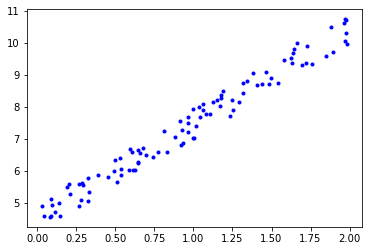

In [2]:
# 构造数据
X = 2 * np.random.rand(100,1)  # X范围0-2, 二维
y = 3*X + 4 + np.random.rand(100,1) # y=3x + 4 # 二维
plt.plot(X,y,'b.')

In [3]:
# 特征加上偏置项
X_b = np.c_[X, np.ones((100,1))]
X_b[:5]

array([[0.67513332, 1.        ],
       [1.66514995, 1.        ],
       [0.59172673, 1.        ],
       [1.98055386, 1.        ],
       [0.26914913, 1.        ]])

In [4]:
# 求解 theta
theta = np.linalg.inv(np.dot(X_b.T, X_b)).dot(X_b.T).dot(y)
theta

array([[2.97422659],
       [4.52845426]])

In [5]:
# 求 决策边界
x_decision_boundary = np.array([[0],[2]])
x_decision_boundary_b = np.concatenate((x_decision_boundary, np.array([[1],[1]])), axis = 1)
x_decision_boundary_b

array([[0, 1],
       [2, 1]])

In [6]:
y_decision_boundry = x_decision_boundary_b.dot(theta)
y_decision_boundry

array([[ 4.52845426],
       [10.47690744]])

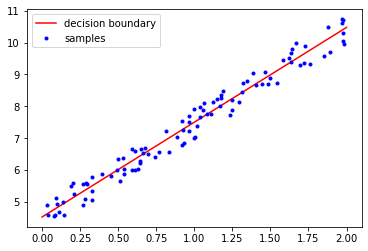

In [7]:
# 绘图
plt.plot(x_decision_boundary, y_decision_boundry, 'r-', label='decision boundary')
plt.plot(X,y,'b.',label='samples')
plt.legend()

### 调用sklearn

In [8]:
# 会自动添加偏置项
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
lr.predict(x_decision_boundary)

array([[ 4.52845426],
       [10.47690744]])

In [9]:
lr.coef_, lr.intercept_ # 权重theta，偏置theta

(array([[2.97422659]]), array([4.52845426]))

## 梯度下降

In [10]:
# X_b, y
num_samples,num_features = X_b.shape
theta_gd_list = []

def plot_gradients_descent(alpha=0.1, n_iters=500, theta_list=None):
    theta = np.random.randn(num_features,1)

    plt.plot(X, y, 'b.')

    for _ in range(n_iters):
        if theta_list is not None:
            theta_list.append(theta.copy())

        y_pre = x_decision_boundary_b.dot(theta)
        plt.plot(x_decision_boundary, y_pre, 'g-')

        grads = -1/num_samples * np.dot(X_b.T, (y - X_b.dot(theta)))
        theta -= alpha * grads


        plt.xlim(0,2)
        plt.ylim(-0.1,15)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend
        plt.title(f'alpha={alpha}')

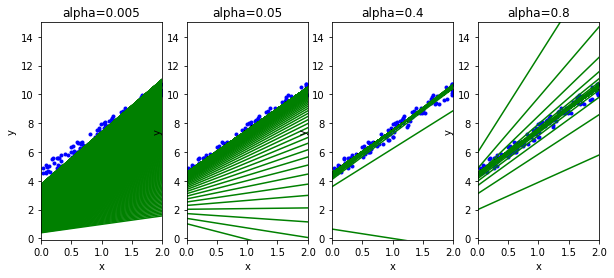

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(141)
plot_gradients_descent(0.005, theta_list = theta_gd_list)
plt.subplot(142)
plot_gradients_descent(0.05)
plt.subplot(143)
plot_gradients_descent(0.4)
plt.subplot(144)
plot_gradients_descent(0.8)
plt.show()

theta_gd_list = np.array(theta_gd_list)

## 随机梯度下降

In [12]:
theta_SGD_list = []
cost_SGD_list = []
n_epochs = 50
theta = np.random.randn(num_features, 1)

# 学习率衰减策略
def learn_schedule(t):
    t0 = 10
    t1 = 2500
    return t0/(t1+t)

def cost(X_b, y, theta):
    num_features = X_b.shape[1]
    num_samples = X_b.shape[0]
    delta = y - np.dot(X_b,theta)
    return 1/(2*num_samples) * np.sum(delta ** 2)

theta_SGD_list.append(theta.copy())
loss_SGD = cost(X_b, y, theta)
cost_SGD_list.append(loss_SGD)
for epoch in range(n_epochs):
    for i in range(num_samples): # 把每个样品都做一次循环得到一个 epoch
        selected = np.random.permutation(num_samples)[0]
        grads = - np.dot(X_b[selected:selected+1].T, (y[selected:selected+1] - X_b[selected:selected+1].dot(theta)))
        alpha = learn_schedule(epoch*num_samples + i)
        theta -= alpha * grads
    
    loss_SGD = cost(X_b, y, theta)
    cost_SGD_list.append(loss_SGD)
    theta_SGD_list.append(theta.copy())

theta_SGD_list = np.array(theta_SGD_list)
theta_SGD_list[:3]

array([[[1.4463147 ],
        [0.52707053]],

       [[3.00391164],
        [2.0362968 ]],

       [[3.56537344],
        [2.70813054]]])

Text(0, 0.5, 'loss')

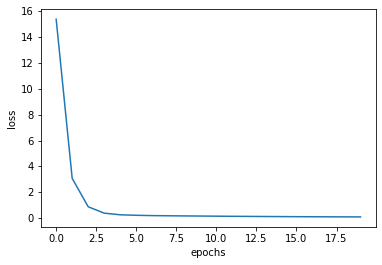

In [13]:
# 简单绘制前n步epoch的loss
plt.plot(range(len(cost_SGD_list[:20])), cost_SGD_list[:20])
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0.5, 1.0, 'theta - cost')

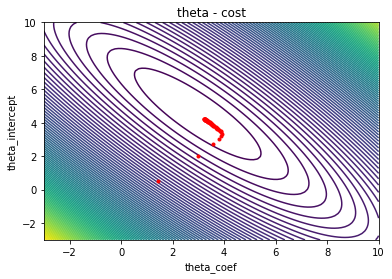

In [14]:
#　等高线　theta - loss
num_each_axis = 100
mesh_theta0 = np.linspace(-3,10,num_each_axis)
mesh_theta1 = np.linspace(-3,10,num_each_axis)
mesh_theta0, mesh_theta1 = np.meshgrid(mesh_theta0, mesh_theta1)
mesh_cost = np.zeros((num_each_axis,num_each_axis))

for i in range(num_each_axis):
    for j in range(num_each_axis):
        theta_ = np.array([[mesh_theta0[i,j]],[mesh_theta1[i,j]]])
        mesh_cost[i,j] = cost(X_b, y, theta_)

plt.contour(mesh_theta0, mesh_theta1, mesh_cost, levels=100)
plt.plot(theta_SGD_list[:,0], theta_SGD_list[:,1], 'r.')
plt.xlabel('theta_coef')
plt.ylabel('theta_intercept')
plt.title("theta - cost")

## mini梯度下降

In [15]:
theta_mini_list = []
cost_mini_list = []

batch_size = 10
n_epochs = 50
iters_per_epoch = int(num_samples / batch_size) + 1

theta = np.random.randn(num_features, 1)

# 学习率衰减策略
def learn_schedule(t):
    t0 = 10
    t1 = 2500
    return t0/(t1+t)

def cost(X_b, y, theta):
    num_features = X_b.shape[1]
    num_samples = X_b.shape[0]
    delta = y - np.dot(X_b,theta)
    return 1/(2*num_samples) * np.sum(delta ** 2)

theta_mini_list.append(theta.copy())
loss_mini = cost(X_b, y, theta)
cost_mini_list.append(loss_mini)

epoch = 0
for i in range(1000000):
    batch_mask = np.random.permutation(num_samples)[:10]
    X_batch = X_b[batch_mask]
    y_batch = y[batch_mask]

    grads = - 1/(batch_size) * np.dot(X_batch.T, (y_batch - X_batch.dot(theta)))
    alpha = learn_schedule(i)
    theta -= alpha * grads
    
    if not i%iters_per_epoch:
        loss_mini = cost(X_b, y, theta)
        cost_mini_list.append(loss_mini)
        theta_mini_list.append(theta.copy())
    
    epoch += 1
    if epoch >= n_epochs:
        break

theta_mini_list = np.array(theta_SGD_list)
theta_mini_list[-3:]

array([[[3.24015974],
        [4.24133858]],

       [[3.22714044],
        [4.23953965]],

       [[3.22369811],
        [4.24336431]]])

Text(0, 0.5, 'loss')

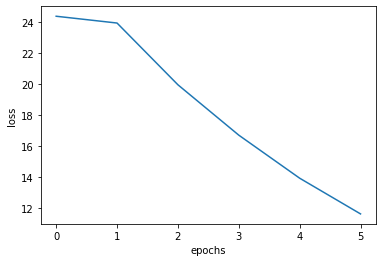

In [16]:
# 简单绘制前n步epoch的loss
plt.plot(range(len(cost_mini_list[:20])), cost_mini_list[:20])
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0.5, 1.0, 'theta - cost')

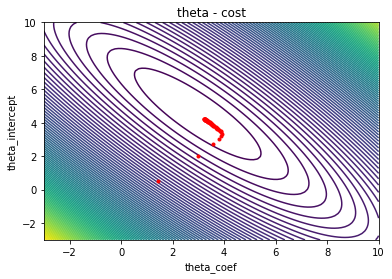

In [17]:
#　等高线　theta - loss
num_each_axis = 100
mesh_theta0 = np.linspace(-3,10,num_each_axis)
mesh_theta1 = np.linspace(-3,10,num_each_axis)
mesh_theta0, mesh_theta1 = np.meshgrid(mesh_theta0, mesh_theta1)
mesh_cost = np.zeros((num_each_axis,num_each_axis))


for i in range(num_each_axis):
    for j in range(num_each_axis):
        theta_ = np.array([[mesh_theta0[i,j]],[mesh_theta1[i,j]]])
        mesh_cost[i,j] = cost(X_b, y, theta_)

plt.contour(mesh_theta0, mesh_theta1, mesh_cost, levels=100)
plt.plot(theta_mini_list[:,0], theta_mini_list[:,1], 'r.')
plt.xlabel('theta_coef')
plt.ylabel('theta_intercept')
plt.title("theta - cost")

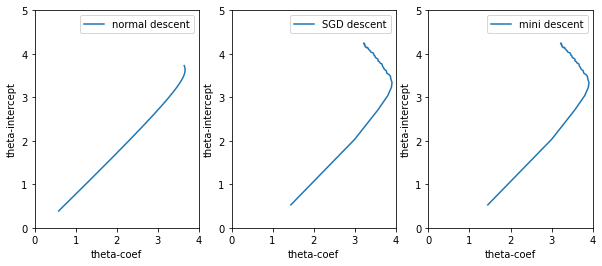

In [18]:
plt.figure(figsize=(10,4))

plt.subplot(131)
plt.plot(theta_gd_list[:,0], theta_gd_list[:,1], label='normal descent')
plt.xlim(0,4)
plt.ylim(0,5)
plt.xlabel('theta-coef')
plt.ylabel('theta-intercept')
plt.legend()

plt.subplot(132)
plt.plot(theta_SGD_list[:,0], theta_SGD_list[:,1], label='SGD descent')
plt.xlim(0,4)
plt.ylim(0,5)
plt.xlabel('theta-coef')
plt.ylabel('theta-intercept')
plt.legend()

plt.subplot(133)
plt.plot(theta_mini_list[:,0], theta_mini_list[:,1], label='mini descent')
plt.xlim(0,4)
plt.ylim(0,5)
plt.xlabel('theta-coef')
plt.ylabel('theta-intercept')
plt.legend()

plt.show()

## 多项式回归

No handles with labels found to put in legend.


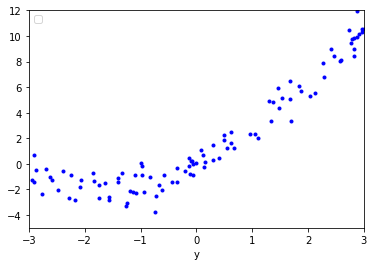

In [19]:
# 创建数据
m = 100 # num_samples
X = 6 * np.random.rand(m, 1) - 3 # 范围 -3 - 3
y = 0.5 * X**2 + 2*X + np.random.randn(m,1)

plt.plot(X, y, 'b.')
plt.axis([-3,3,-5,12])
plt.xlabel("X")
plt.xlabel("y")
plt.legend()
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2, include_bias=False) # 不加偏置
polynomial_features.fit(X)
X_polynomial = polynomial_features.transform(X)
X[:3], X_polynomial[:3]

(array([[ 1.11221322],
        [-1.75179802],
        [ 0.1514573 ]]),
 array([[ 1.11221322,  1.23701824],
        [-1.75179802,  3.06879631],
        [ 0.1514573 ,  0.02293931]]))

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_polynomial, y)
lr.coef_, lr.intercept_

(array([[1.97235439, 0.54992266]]), array([-0.01664598]))

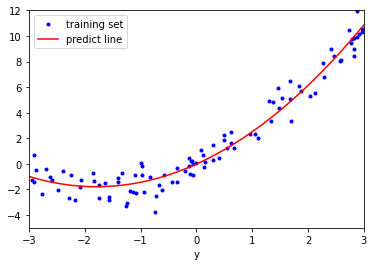

In [22]:
# 绘制决策曲线
x_decision_boundary = np.linspace(-3,3,100).reshape(-1,1)
x_decision_boundary_polynomial = polynomial_features.transform(x_decision_boundary)
y_decision_boundary = lr.predict(x_decision_boundary_polynomial)

plt.plot(X, y, 'b.', label="training set")
plt.plot(x_decision_boundary, y_decision_boundary, 'r-', label="predict line")

plt.axis([-3,3,-5,12])
plt.xlabel("X")
plt.xlabel("y")
plt.legend()
plt.show()

### 多项式的模型复杂度
- 使用 pipline 按顺序处理特征 X，polynomialfeatures -> standardscaler -> linearregression

polynomial_degree = 12, loss = 28.81
polynomial_degree = 2, loss = 29.03
polynomial_degree = 1, loss = 28.94


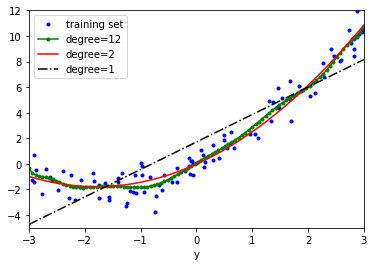

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 绘制训练数据
plt.plot(X, y, 'b.', label="training set")

# 绘制不同 Polynomial degree 的训练线条
for style, degree in [('g.-',12),('r-',2),('k-.',1)]:
    
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std = StandardScaler()
    linear_regressin = LinearRegression()
    pipline = Pipeline([("polys", poly_features),("standard", std),("lr", linear_regressin)])

    pipline.fit(X, y)
    y_pre = pipline.predict(x_decision_boundary)

    loss = mean_squared_error(y, y_pre)
    print('polynomial_degree = %d, loss = %.2f' % (degree, loss))

    plt.plot(x_decision_boundary, y_pre, style, label=f"degree={degree}")

# 绘图细节
plt.axis([-3,3,-5,12])
plt.xlabel("X")
plt.xlabel("y")
plt.legend()
plt.show()

## 特征数量对结果的影响

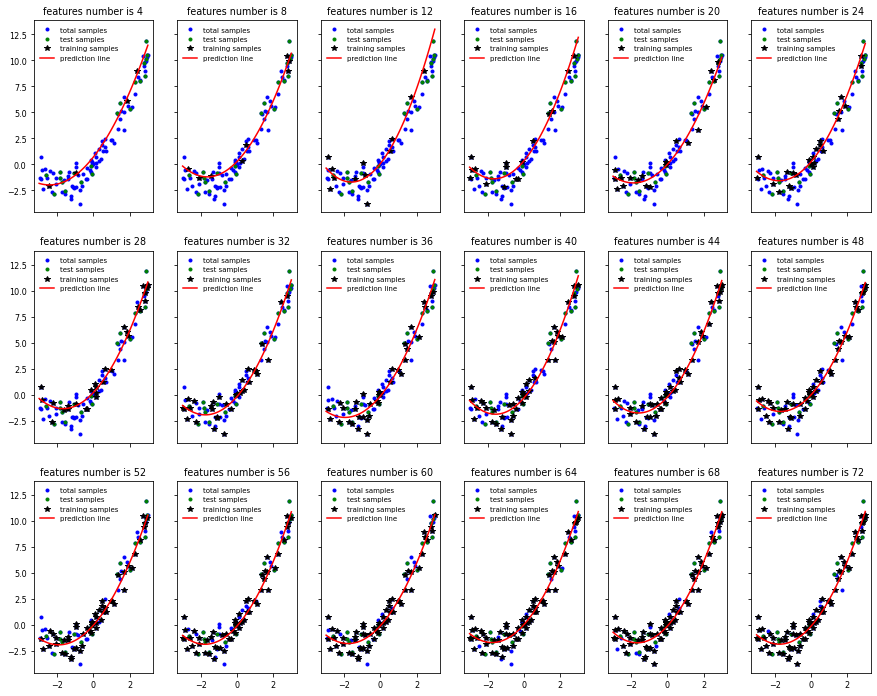

In [24]:
plt.rcParams['font.size'] = 8

# 分割测试训练集
from sklearn.model_selection import train_test_split
test_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio) # 样本总量是100, 训练数量20%，20个

# 设定特征数量
num_sepa = 18 # num_sepa个不同的特征数量,画图画三行，这里要是三的倍数
num_train = X_train.shape[0]

increment = int(num_train / num_sepa)
num_features_list = [(i+1)*increment for i in range(num_sepa)]

# 误差
rmse_train = []
rmse_test = []

# 设定pipline
poly_features = PolynomialFeatures(degree=2, include_bias=False)
std = StandardScaler()
linear_regressin = LinearRegression()
pipline = Pipeline([("polys", poly_features),("standard", std),("lr", linear_regressin)])

fig, axes = plt.subplots(3, int(num_sepa/3), sharex=True, sharey=True, figsize=(15,12))
axes = axes.flatten()
for index,train_size in enumerate(num_features_list):
    mask = np.random.permutation(num_train)[:train_size]
    X_batch = X_train[mask]
    y_batch = y_train[mask]
    pipline.fit(X_batch, y_batch)
    y_pre = pipline.predict(x_decision_boundary)

    y_batch_pre = pipline.predict(X_batch)
    y_test_pre = pipline.predict(X_test)
    rmse_train.append(np.sqrt(mean_squared_error(y_batch, y_batch_pre)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pre)))
    
    # 总样本
    axes[index].plot(X, y, 'b.', label="total samples")
    # 测试样本
    axes[index].plot(X_test, y_test, 'g.', label="test samples")
    # 训练样本
    axes[index].plot(X_batch, y_batch, 'k*',label="training samples")
    # 预测曲线
    axes[index].plot(x_decision_boundary, y_pre, 'r-', label="prediction line")
    # 标题
    axes[index].set_title(f"features number is {train_size}")
    # 获得当前画板对象
    fig.sca(axes[index])
    plt.legend(frameon=False, fontsize=7)

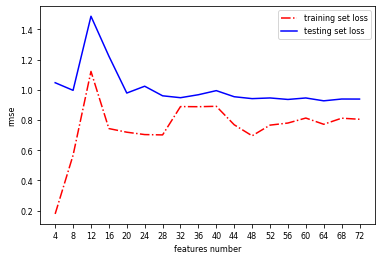

In [25]:
plt.plot(range(len(rmse_train)), rmse_train, 'r-.', label='training set loss')
plt.plot(range(len(rmse_test)), rmse_test, 'b-', label='testing set loss')
plt.xticks(range(len(rmse_train)), num_features_list)
plt.xlabel("features number")
plt.ylabel("rmse")
plt.legend()
plt.show()

## 正则化 - 防止过拟合 
### 岭回归: 
cost = MSE(theta) + alpha/2 * theat.T.dot(theta) 加了一个正则项， alpha是正则项惩罚力度

e:\app\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.167e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


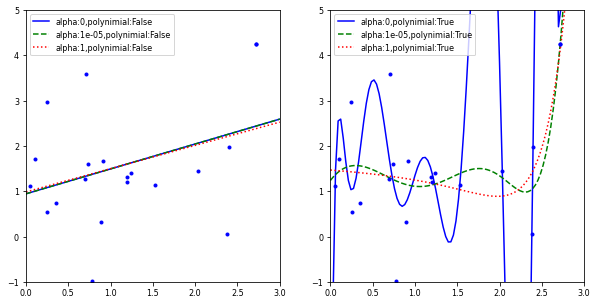

In [26]:
# 对比不同alpha的影响
from sklearn.linear_model import Ridge
from sklearn.tree import plot_tree
m = 20
X = 3*np.random.rand(m,1)
y = 0.5 * X + np.random.randn(m,1) + 1
x_decision_boundary = np.linspace(0,3,100).reshape(100,-1)

def plot_ridge(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('b-','g--','r:')):
        # 设定pipline
        pipline = model_class(alpha, **model_kargs)
        if polynomial:
            poly_features = PolynomialFeatures(degree=12, include_bias=False)
            std = StandardScaler()
            model = model_class(alpha,**model_kargs)
            pipline = Pipeline([("polys", poly_features),("standard", std),("model", model)])
        pipline.fit(X,y)
        y_decision_boundary = pipline.predict(x_decision_boundary)
        plt.plot(x_decision_boundary, y_decision_boundary, style, label=f'alpha:{alpha},polynimial:{polynomial}')
    plt.plot(X,y,'b.')
    plt.legend()

plt.figure(figsize=(10,5))
plt.subplot(121)
plot_ridge(Ridge, polynomial=False, alphas=[0,10**-5,1])
plt.axis([0,3,-1,5])
plt.subplot(122)
plot_ridge(Ridge, polynomial=True, alphas=[0,10**-5,1])
plt.axis([0,3,-1,5])
plt.show()

## lasso

<ipython-input-26-91cde7941b7f>:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  pipline.fit(X,y)
e:\app\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:653: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
e:\app\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:653: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.457e+01, tolerance: 3.347e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
e:\app\anaconda3\lib\site-packages\sklearn\pipeline.py:382: Use

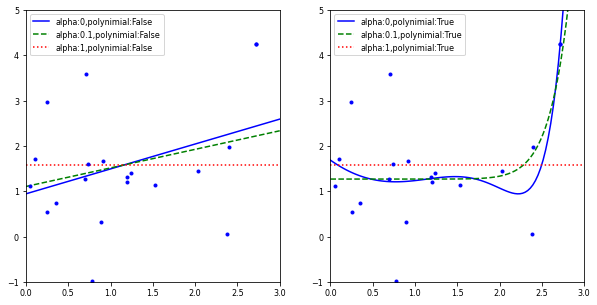

In [29]:
from sklearn.linear_model import Lasso
plt.figure(figsize=(10,5))
plt.subplot(121)
plot_ridge(Lasso, polynomial=False, alphas=[0,0.1,1])
plt.axis([0,3,-1,5])
plt.subplot(122)
plot_ridge(Lasso, polynomial=True, alphas=[0,0.1,1])
plt.axis([0,3,-1,5])
plt.show()

In [10]:
a=5
y = lambda x=3: f(a)
def f(a):
    return 2*a
y()

10